In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utility
from tic_env import TictactoeEnv, OptimalPlayer
from q_learning import Q_learner, Q_learner_exploration
%load_ext autoreload
%autoreload 2

In [2]:
seed = 1998
np.random.seed(seed)

**Q.1.**

In [3]:
alpha = 0.05
gamma = 0.99
epsilon = 0.05

In [4]:
training_number = 20000
q_learner = Q_learner(alpha, gamma, epsilon, seed=seed)
rewards = q_learner.train(training_number, 0.5)

Text(0.5, 1.0, 'average reward over the last 250 games with $\\epsilon=0.05$')

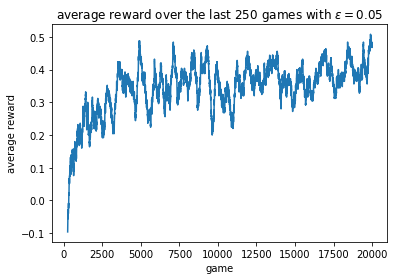

In [5]:
window_size = 250

plt.figure(0)
plt.plot(np.arange(training_number-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size)
plt.xlabel('game')
plt.ylabel('average reward')
plt.title(r'average reward over the last 250 games with $\epsilon=0.05$')

**Q.2.**

In [6]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.linspace(1, 40000, 10)

In [7]:
print(n_stars)

[1.00000000e+00 4.44533333e+03 8.88966667e+03 1.33340000e+04
 1.77783333e+04 2.22226667e+04 2.66670000e+04 3.11113333e+04
 3.55556667e+04 4.00000000e+04]


In [8]:
training_number = 20000
rewards_iter = []
for n_star in n_stars:
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    rewards_iter.append(q_learner.train(training_number, 0.5))

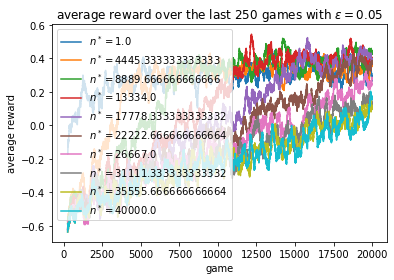

In [9]:
window_size = 250

plt.figure(0)
for n_star, rewards in zip(n_stars, rewards_iter):
    plt.plot(np.arange(training_number-window_size+1)+window_size, np.convolve(rewards, np.ones(window_size), 'valid') / window_size, label=r'$n^*=${}'.format(n_star))
plt.xlabel('game')
plt.ylabel('average reward')
plt.title(r'average reward over the last 250 games with varying $n^*$')
plt.legend()

**Q.3.**

In [10]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.linspace(1, 40000, 10)

In [11]:
training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for n_star in n_stars:
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.train(window_size, 0.5)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

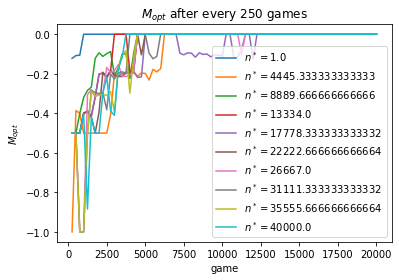

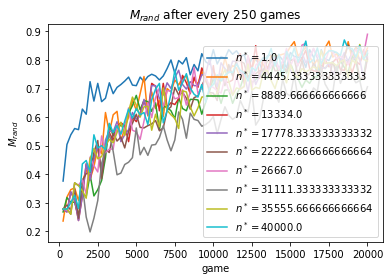

In [12]:
ratio = int(training_number/window_size)

plt.figure(0)
for n_star, M_opts in zip(n_stars, M_opts_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$n^*=${}'.format(n_star))
plt.xlabel('game')
plt.ylabel(r'$M_{opt}$')
plt.title(r'$M_{opt}$ after every 250 games')
plt.legend()

plt.figure(1)
for n_star, M_rands in zip(n_stars, M_rands_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$n^*=${}'.format(n_star))
plt.xlabel('game')
plt.ylabel(r'$M_{rand}$')
plt.title(r'$M_{rand}$ after every 250 games')
plt.legend()

**Q.4.**

In [16]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 1 # empirically determined best value

epsilon_opts = np.linspace(0, 1, 10)

In [17]:
training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for epsilon_opt in epsilon_opts:  
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.train(window_size, epsilon_opt)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

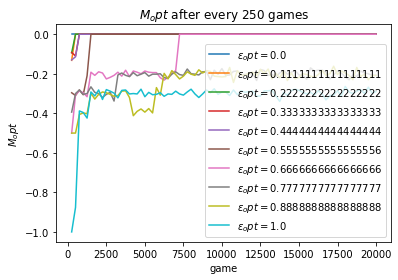

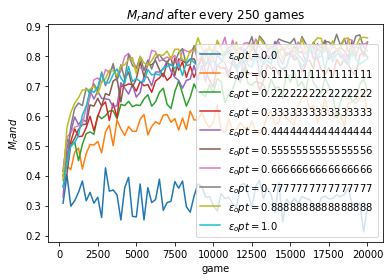

In [18]:
ratio = int(training_number/window_size)

plt.figure(0)
for epsilon_opt, M_opts in zip(epsilon_opts, M_opts_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$\epsilon_opt=${}'.format(epsilon_opt))
plt.xlabel('game')
plt.ylabel(r'$M_opt$')
plt.title(r'$M_opt$ after every 250 games')
plt.legend()

plt.figure(1)
for epsilon_opt, M_rands in zip(epsilon_opts, M_rands_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$\epsilon_opt=${}'.format(epsilon_opt))
plt.xlabel('game')
plt.ylabel(r'$M_rand$')
plt.title(r'$M_rand$ after every 250 games')
plt.legend()

**Q.5.**

In [19]:
for epsilon_opt, opt_max, rand_max in zip(epsilon_opts, [np.max(np.array(M_opts)) for M_opts in M_opts_iter], [np.max(np.array(M_rands)) for M_rands in M_rands_iter]):
    print(r'epsilon_opt={} : max M_opt={} M_rand={}'.format(epsilon_opt, opt_max, rand_max))

epsilon_opt=0.0 : max M_opt=0.0 M_rand=0.426
epsilon_opt=0.1111111111111111 : max M_opt=0.0 M_rand=0.678
epsilon_opt=0.2222222222222222 : max M_opt=0.0 M_rand=0.762
epsilon_opt=0.3333333333333333 : max M_opt=0.0 M_rand=0.832
epsilon_opt=0.4444444444444444 : max M_opt=0.0 M_rand=0.848
epsilon_opt=0.5555555555555556 : max M_opt=0.0 M_rand=0.852
epsilon_opt=0.6666666666666666 : max M_opt=0.0 M_rand=0.862
epsilon_opt=0.7777777777777777 : max M_opt=-0.17 M_rand=0.872
epsilon_opt=0.8888888888888888 : max M_opt=-0.162 M_rand=0.862
epsilon_opt=1.0 : max M_opt=-0.264 M_rand=0.828


**Q.6**

No they would not, since the optimal values are not unique against Opt(1), in particular there exists some optimal values playing against Opt(1) which are not optimal when playing against Opt(0). Counter-example : ...

**Q.7**

In [3]:
alpha = 0.05
gamma = 0.99
epsilons = np.linspace(0, 1, 10)

In [4]:
training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for epsilon in epsilons:  
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner(alpha, gamma, epsilon, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.self_train(window_size)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

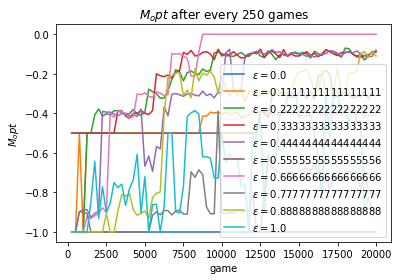

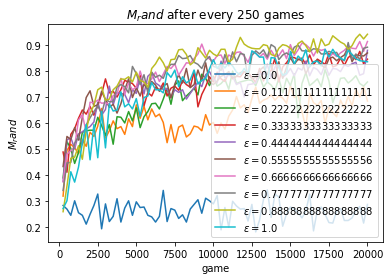

In [5]:
ratio = int(training_number/window_size)

plt.figure(0)
for epsilon, M_opts in zip(epsilons, M_opts_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$\epsilon=${}'.format(epsilon))
plt.xlabel('game')
plt.ylabel(r'$M_opt$')
plt.title(r'$M_opt$ after every 250 games')
plt.legend()

plt.figure(1)
for epsilon, M_rands in zip(epsilons, M_rands_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$\epsilon=${}'.format(epsilon))
plt.xlabel('game')
plt.ylabel(r'$M_rand$')
plt.title(r'$M_rand$ after every 250 games')
plt.legend()

**Q.8**

In [6]:
alpha = 0.05
gamma = 0.99
epsilon_min = 0.1
epsilon_max = 0.8
n_stars = np.logspace(0, 5, 10)

In [7]:
training_number = 20000
window_size = 250

M_opts_iter = []
M_rands_iter = []

for n_star in n_stars:
    M_opts = []
    M_rands = []
    
    q_learner = Q_learner_exploration(alpha, gamma, epsilon_min, epsilon_max, n_star, seed=seed)
    for i in range(int(training_number/window_size)):
        q_learner.self_train(window_size)
        
        M_opts.append(utility.M_opt(q_learner))
        M_rands.append(utility.M_rand(q_learner))
    
    M_opts_iter.append(M_opts)
    M_rands_iter.append(M_rands)

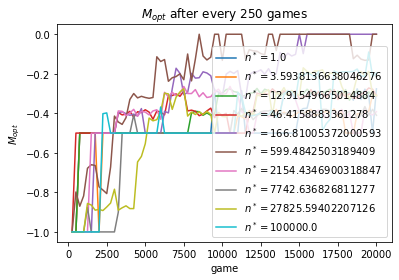

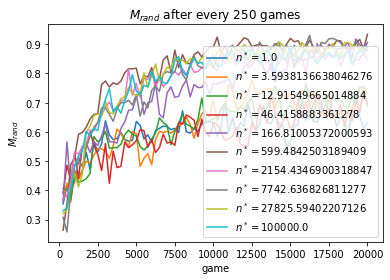

In [8]:
ratio = int(training_number/window_size)

plt.figure(0)
for n_star, M_opts in zip(n_stars, M_opts_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_opts, label=r'$n^*=${}'.format(n_star))
plt.xlabel('game')
plt.ylabel(r'$M_{opt}$')
plt.title(r'$M_{opt}$ after every 250 games')
plt.legend()

plt.figure(1)
for n_star, M_rands in zip(n_stars, M_rands_iter):
    plt.plot((np.arange(ratio)+1)*window_size, M_rands, label=r'$n^*=${}'.format(n_star))
plt.xlabel('game')
plt.ylabel(r'$M_{rand}$')
plt.title(r'$M_{rand}$ after every 250 games')
plt.legend()

**Q.9**

In [9]:
for n_star, opt_max, rand_max in zip(n_stars, [np.max(np.array(M_opts)) for M_opts in M_opts_iter], [np.max(np.array(M_rands)) for M_rands in M_rands_iter]):
    print(r'n_star={} : max M_opt={} M_rand={}'.format(n_star, opt_max, rand_max))

n_star=1.0 : max M_opt=-0.276 M_rand=0.726
n_star=3.5938136638046276 : max M_opt=-0.306 M_rand=0.778
n_star=12.91549665014884 : max M_opt=-0.274 M_rand=0.766
n_star=46.4158883361278 : max M_opt=-0.272 M_rand=0.732
n_star=166.81005372000593 : max M_opt=0.0 M_rand=0.918
n_star=599.4842503189409 : max M_opt=0.0 M_rand=0.934
n_star=2154.4346900318847 : max M_opt=-0.264 M_rand=0.888
n_star=7742.636826811277 : max M_opt=-0.366 M_rand=0.93
n_star=27825.59402207126 : max M_opt=-0.17 M_rand=0.908
n_star=100000.0 : max M_opt=-0.09 M_rand=0.892


**Q.10**

[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
X turn


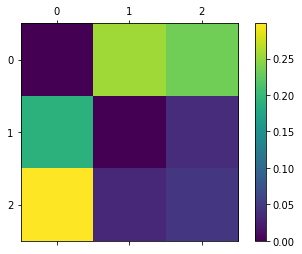

In [11]:
state = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., 0.]])
utility.show_Q_s(q_learner, state)
print(state)
print("X turn")

[[-1.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]
O turn


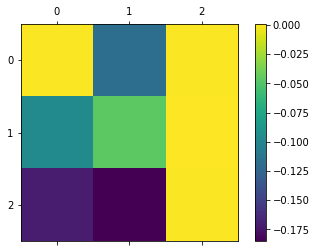

In [13]:
state = np.array([[-1., 0., 1.], [0., 0., 0.], [0., 0., 1.]])
utility.show_Q_s(q_learner, state)
print(state)
print("O turn")

[[ 1.  0.  1.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]
X turn


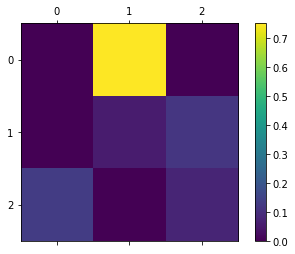

In [14]:
state = np.array([[1., 0., 1.], [-1., 0., 0.], [0., -1., 0.]])
utility.show_Q_s(q_learner, state)
print(state)
print("X turn")